In [45]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Cargar Datos

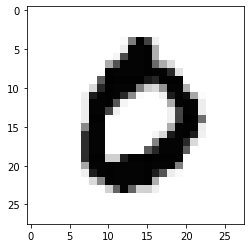

In [57]:
# Descargar el mnist de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Imprimir un sample
import matplotlib.pyplot as plt
plt.imshow(x_test[3], cmap='Greys')
plt.show()

## Normalizar Imagenes

In [47]:
# Scaling para que las imagenes queden de [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape

(60000, 28, 28)

In [48]:
# Convertir las imagenes en (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

## Etiquetas como Categoricos

In [49]:
# Numero de clases
num_classes = 10

# generar las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Arquitetura Perceptron

In [53]:
# tamano de la imagen de entrada
input_shape = (28, 28, 1)

# definicion del modelo Perceptron
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build(input_shape)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


## Entrenar la Red Neuronal

In [54]:
# Definir los parametros de optimizacion y perdida del modelo (con CrossValidation)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4380 - acc: 0.8800 - val_loss: 0.2250 - val_acc: 0.9382
Epoch 2/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.1969 - acc: 0.9438 - val_loss: 0.1681 - val_acc: 0.9528
Epoch 3/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.1438 - acc: 0.9588 - val_loss: 0.1360 - val_acc: 0.9618
Epoch 4/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.1121 - acc: 0.9686 - val_loss: 0.1233 - val_acc: 0.9648
Epoch 5/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.0906 - acc: 0.9751 - val_loss: 0.1096 - val_acc: 0.9683
Epoch 6/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.0757 - acc: 0.9791 - val_loss: 0.1044 - val_acc: 0.9718
Epoch 7/10
48000/48000 [==============================] - 0s 6us/sample - loss: 0.0629 - acc: 0.9829 - val_loss: 0.0929 -

## Evaluar el Modelo

In [55]:
# Obtener el score obtenido del modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07941788219101727
Test accuracy: 0.9768


## Predecir una Imagen

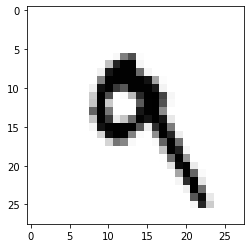

[[2.6925235e-07 1.8044953e-05 4.4124026e-05 1.3257719e-03 1.1604076e-03
  3.1496031e-05 2.3125024e-08 3.6678506e-05 2.9739980e-05 9.9735343e-01]]


In [81]:
# obtener una imagen del dataset
testimg = x_test[7]

# imprimir
plt.imshow(testimg, cmap='Greys')
plt.show()

# normalizar la imagen y expandirla
testimg = testimg.astype("float32") / 255
testimg = np.expand_dims(testimg, -1)

# generar las probabilidades
y_pred = model.predict(np.array([testimg]))

# imprimir la lista de probabilidades
print(y_pred)

In [82]:
# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)

# imprimir la clase
print("Prediccion:",y_class[0])

Prediccion: 9
